求解一维热传导方程

$$\frac{\partial u}{\partial t}-\frac{\partial^2 u}{\partial x^2}=f,   x\in I=[0,L],t\in J=[0,T]$$

边界条件$$u(0,t)=0,  u(1,t)=0$$

初始解$$u(x,0)=u_{0}(x)$$

已知$$f=(1+\pi^2)\cdot\mathrm{e}^t\cdot\sin(\pi x),u_{0}(x)=\sin(\pi x)$$

解析解$$u(x,t)=\mathrm{e}^t\cdot\sin(\pi x)$$

In [1]:
'''一些必要的模块'''
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
%matplotlib inline

In [2]:
'''空间方向的均匀剖分'''
I = [0, 1]
N1 = 32 #均匀剖分的段数
h = 1 / N1
x = np.linspace(0, 1, N1 + 1)

In [3]:
'''时间方向的均匀剖分'''
J = [0, 1]
N2 = 4 * N1 ** 2 #均匀剖分的段数
tau = 1 / N2
t = np.linspace(0, 1, N2 + 1)

In [4]:
'''装载总刚度矩阵A并更新A'''
A_1 = np.zeros((N1 + 1, N1 + 1))
for i in np.arange(N1):
    A_1[i][i] = A_1[i][i] + 1 / h
    A_1[i][i + 1] = A_1[i][i + 1] - 1 / h
    A_1[i + 1][i] = A_1[i + 1][i] - 1 / h
    A_1[i + 1][i + 1] = A_1[i + 1][i + 1] + 1 / h
    
M_1 = np.zeros((N1 + 1, N1 + 1))
for i in np.arange(N1):    
    M_1[i][i] = M_1[i][i] + h / 3
    M_1[i][i + 1] = M_1[i][i + 1] + h / 6
    M_1[i + 1][i] = M_1[i + 1][i] + h / 6
    M_1[i + 1][i + 1] = M_1[i + 1][i + 1] + h / 3
    
A = np.zeros((N1 + 1, N1 + 1))
A = tau * A_1 + M_1
A[[0, -1], :] = 0
A[:, [0, -1]] = 0
A[(0, -1), (0, -1)] = 1

In [5]:
'''装载载荷向量b_1'''
def f(x, t):
    f = (1 + (np.pi) ** 2) * np.exp(t) * np.sin(np.pi * x)
    return f

b = np.zeros(N1 + 1)
b_1 = np.zeros((N2 + 1, N1 + 1))
for j in np.arange(N2 + 1):
    for i in np.arange(N1):
        b[i] = b[i] + f(x[i], t[j]) * h / 2
        b[i + 1] = b[i + 1] + f(x[i + 1], t[j]) * h / 2
    b_1[j] = b
    b = np.zeros(N1 + 1)

In [6]:
'''向后欧拉迭代求解数值解U_h'''
def u_0(x):
    u_0 = np.sin(np.pi * x)
    return u_0

Uh = np.zeros(N1 + 1)
for i in np.arange(N1 + 1):
    Uh[i] = u_0(x[i])
U_h = np.zeros((N2 + 1, N1 + 1))
U_h[0] = Uh

for i in np.arange(N2):
    b = M_1 @ U_h[i] + tau * (b_1[i + 1])
    b[0] = 0
    b[-1] = 0
    U_h[i+1] = np.linalg.solve(A, b)

In [7]:
'''真解的函数值U'''
def u(x, t):
    u = np.exp(t) * np.sin(np.pi * x)
    return u
U = np.zeros((N2 + 1, N1 + 1))
for i in np.arange(N2 + 1):
    for j in np.arange(N1 + 1):
        U[i][j] = u(x[j], t[i])

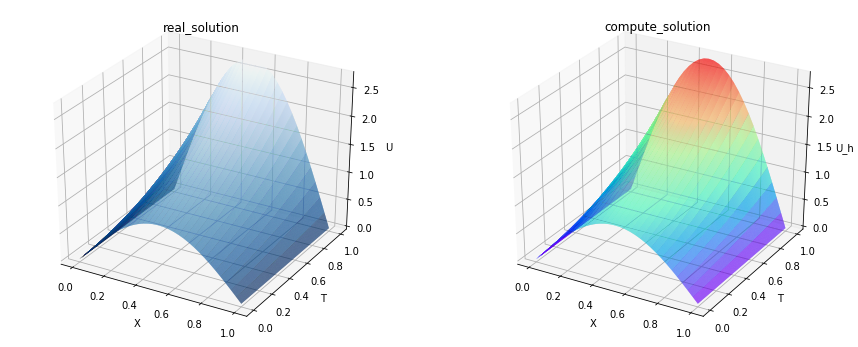

In [8]:
'''真解和数值解的三维图'''
fig = plt.figure(figsize = (15, 6))
x1, t1 = np.mgrid[:1:complex(N1 + 1), :1:complex(N2 + 1)]
x = x1.T
t = t1.T
u = np.exp(t) * np.sin(np.pi * x)
ax = fig.add_subplot(1, 2, 1, projection = '3d')
figure = ax.plot_surface(x, t, u, rstride=1, cstride=1, cmap=plt.cm.Blues_r)
ax.set_title("real_solution")
ax.set_xlabel("X")
ax.set_ylabel("T")
ax.set_zlabel("U")

ax = fig.add_subplot(1, 2, 2, projection = '3d')
figure = ax.plot_surface(x, t, U_h, rstride = 1, cstride = 1, cmap = 'rainbow')
ax.set_title("compute_solution")
ax.set_xlabel("X")
ax.set_ylabel("T")
ax.set_zlabel("U_h")

plt.show()

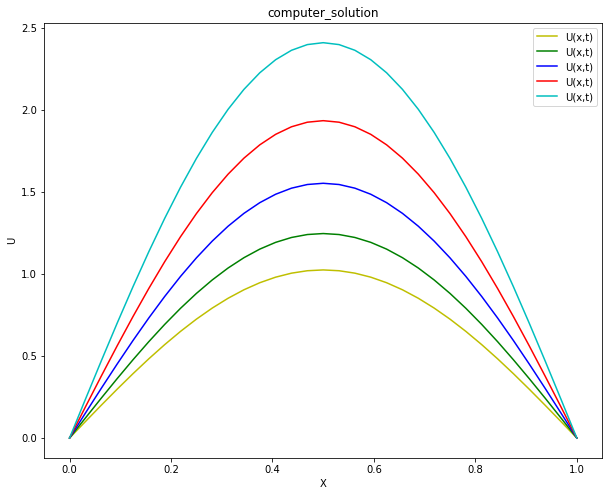

In [9]:
'''5个不同时间层绘图'''
x = np.linspace(0, 1, N1 + 1)
plt.figure(figsize=(10,8))

plt.plot(x, U_h[100], label = "U(x,t)", color = "y")
plt.plot(x, U_h[900], label = "U(x,t)", color = "g")
plt.plot(x, U_h[1800], label = "U(x,t)", color = "b")
plt.plot(x, U_h[2700],label = "U(x,t)", color = "r")
plt.plot(x, U_h[3600],label = "U(x,t)", color = "c")

plt.xlabel("X")
plt.ylabel("U")
plt.title("computer_solution")
plt.legend()
plt.show()

In [10]:
'''误差的L2范数'''
Z = np.zeros(N1 + 1)
Z_1 = np.zeros((N2 + 1, N1 + 1))
Z_1 = (U-U_h) ** 2 * h / 2
for j in np.arange(N2 + 1):
    for i in np.arange(N1):
        Z[i] = Z[i] + Z_1[j][i]
        Z[i + 1] = Z[i + 1] + Z_1[j][i + 1]
    Z_1[j] = Z
    Z = np.zeros(N1 + 1)
e = np.sum(Z_1, axis=1)

e1 = np.zeros(N2 + 1)
for i in np.arange(N2):
    e1[i] = e1[i] + e[i]
    e1[i + 1] = e1[i + 1] + e[i + 1]
e = np.sum(e1) * tau / 2
error = np.sqrt(e)
print(error)

0.0002729136587383092


## error2=0.3151324792890479
## error4=0.07194425457098891
## error8=0.01759270178173241
## error16=0.004374100563242734
## error32=0.0010920283427787194
## error64=0.0002729136587383092

In [11]:
[error2/error4,error4/error8,error8/error16,error16/error32,error32/error64]

[4.380231349511031,
 4.0894375101437275,
 4.0220158469996585,
 4.005482634372495,
 4.001369326208187]